# Stackering

Import libraries

In [1]:
import rasterio
from rasterio.merge import merge
import glob
import os
from rasterio.plot import show

Define directories path and the search criteria

In [2]:
input_path = "/home/jovyan/work/Training_stuff/sentinel_stackering"
img_fp = "/home/jovyan/work/Training_stuff/sentinel_stackering/stackering.tif"

search_criteria = "SENTINEL*.tif" 

Obtain all the bands for stackering

In [3]:
p = os.path.join(input_path, search_criteria)
all_files  =  glob.glob(p)
print(all_files)

['/home/jovyan/work/Training_stuff/sentinel_stackering/SENTINEL2A_20200927-110006-031_L2A_T30TYK_C_V2-2_SRE_B3.tif', '/home/jovyan/work/Training_stuff/sentinel_stackering/SENTINEL2A_20200927-110006-031_L2A_T30TYK_C_V2-2_SRE_B4.tif', '/home/jovyan/work/Training_stuff/sentinel_stackering/SENTINEL2A_20200927-110006-031_L2A_T30TYK_C_V2-2_SRE_B8.tif']


Get metadata info

In [4]:
with rasterio.open(all_files[0]) as src0:
    meta = src0.meta
meta.update(count = len(all_files)) # update metadate 'count'

meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32630),
 'transform': Affine(10.0, 0.0, 699960.0,
        0.0, -10.0, 4500000.0)}

Stack all the band from the different raster images

In [5]:
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(all_files, start=1):
        print(id,layer)
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1)) # stackering bands in img_fp file

1 /home/jovyan/work/Training_stuff/sentinel_stackering/SENTINEL2A_20200927-110006-031_L2A_T30TYK_C_V2-2_SRE_B3.tif
2 /home/jovyan/work/Training_stuff/sentinel_stackering/SENTINEL2A_20200927-110006-031_L2A_T30TYK_C_V2-2_SRE_B4.tif
3 /home/jovyan/work/Training_stuff/sentinel_stackering/SENTINEL2A_20200927-110006-031_L2A_T30TYK_C_V2-2_SRE_B8.tif


Check metadata from the final raster image

In [39]:
print('Shape of the raster image {} composed by {} bands.'.format(full_dataset.shape, full_dataset.count))

Shape of the raster image (10980, 10980) composed by 3 bands.


Show raster image

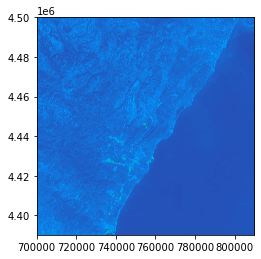

<AxesSubplot:>

In [38]:
full_dataset = rasterio.open(img_fp)
show(full_dataset, cmap='terrain')